In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content

Mounted at /content/gdrive
/content


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [2]:
dataset = pd.read_csv('/content/gdrive/MyDrive/Iris (1).csv')
df = pd.DataFrame(dataset)
df = df.sample(frac=1)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
14,15,5.8,4.0,1.2,0.2,Iris-setosa
16,17,5.4,3.9,1.3,0.4,Iris-setosa
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
63,64,6.1,2.9,4.7,1.4,Iris-versicolor
77,78,6.7,3.0,5.0,1.7,Iris-versicolor


In [3]:
df = df.drop(columns=['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
14,5.8,4.0,1.2,0.2,Iris-setosa
16,5.4,3.9,1.3,0.4,Iris-setosa
52,6.9,3.1,4.9,1.5,Iris-versicolor
63,6.1,2.9,4.7,1.4,Iris-versicolor
77,6.7,3.0,5.0,1.7,Iris-versicolor


In [4]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [5]:
encoder = LabelEncoder()
df['Species'] = encoder.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
14,5.8,4.0,1.2,0.2,0
16,5.4,3.9,1.3,0.4,0
52,6.9,3.1,4.9,1.5,1
63,6.1,2.9,4.7,1.4,1
77,6.7,3.0,5.0,1.7,1


In [6]:
X = df.drop(columns=['Species'])
X = np.array(X, dtype='float32')
X = X.reshape(-1, 4)
Y = df['Species']
Y = np.array(Y, dtype='int32')

In [7]:
tree = DecisionTreeClassifier(max_depth=4, min_samples_split=10)
tree.fit(X, Y)
tree.score(X, Y)

0.98

[Text(421.6000000000001, 489.24, 'PetalLengthCm <= 2.45\ngini = 0.667\nsamples = 100.0%\nvalue = [0.333, 0.333, 0.333]\nclass = Iris Setosa'),
 Text(316.20000000000005, 380.52000000000004, 'gini = 0.0\nsamples = 33.3%\nvalue = [1.0, 0.0, 0.0]\nclass = Iris Setosa'),
 Text(527.0000000000001, 380.52000000000004, 'PetalWidthCm <= 1.75\ngini = 0.5\nsamples = 66.7%\nvalue = [0.0, 0.5, 0.5]\nclass = Iris Versicolor'),
 Text(316.20000000000005, 271.8, 'PetalLengthCm <= 4.95\ngini = 0.168\nsamples = 36.0%\nvalue = [0.0, 0.907, 0.093]\nclass = Iris Versicolor'),
 Text(210.80000000000004, 163.08000000000004, 'PetalWidthCm <= 1.65\ngini = 0.041\nsamples = 32.0%\nvalue = [0.0, 0.979, 0.021]\nclass = Iris Versicolor'),
 Text(105.40000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 31.3%\nvalue = [0.0, 1.0, 0.0]\nclass = Iris Versicolor'),
 Text(316.20000000000005, 54.360000000000014, 'gini = 0.0\nsamples = 0.7%\nvalue = [0.0, 0.0, 1.0]\nclass = Iris Viginica'),
 Text(421.6000000000001, 163.08

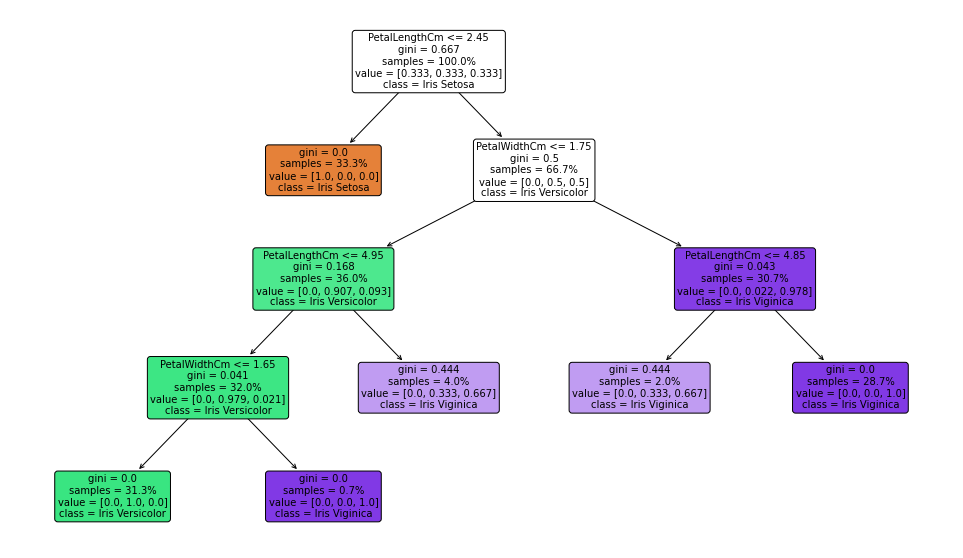

In [8]:
fig = plt.figure(figsize=(17, 10))
plot_tree(tree,
          feature_names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
          class_names=['Iris Setosa', 'Iris Versicolor', 'Iris Viginica'],
          filled=True,
          proportion=True,
          rotate=True,
          rounded=True,
          fontsize=10)